# All things Sapota 🫒

Mahashruthi K B - 1932022

In [3]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Load the sales data from sales_data_1.csv
sales_data_1 = pd.read_csv("sales_data_1.csv")

In [5]:
sales_data_1.head(3)

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15


In [6]:
sales_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              70 non-null     object 
 1   Firm bought from  70 non-null     object 
 2   Buying price      70 non-null     float64
 3   Customer          70 non-null     object 
 4   Selling price     70 non-null     float64
 5   Quantity sold     70 non-null     int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.4+ KB


### 1. What is their overall gross margin for their business?


In [7]:
# Calculate the gross margin for each row
sales_data_1["Gross Margin"] = (sales_data_1["Selling price"] - sales_data_1["Buying price"]) * sales_data_1["Quantity sold"]

# Calculate the overall gross margin for the business
total_gross_margin = sales_data_1["Gross Margin"].sum()
print(f"Overall gross margin for the business: {total_gross_margin:.2f}")


Overall gross margin for the business: 31482.75


In [8]:
sales_data_1.head(3)

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold,Gross Margin
0,21/08/23,Vendor6,72.11,Customer7,91.58,44,856.68
1,21/08/23,Vendor4,75.08,Customer7,83.71,17,146.71
2,21/08/23,Vendor7,83.93,Customer2,103.76,15,297.45


### 2. Which vendor is the most profitable?

In [9]:
vendor_profit = sales_data_1.groupby("Firm bought from")["Gross Margin"].sum()
most_profitable_vendor = vendor_profit.idxmax()
print("Profit for each vendor:",vendor_profit)
print(f"Most profitable vendor: {most_profitable_vendor}")
print(f"Profit: {vendor_profit.max():.2f}")

Profit for each vendor: Firm bought from
Vendor1     1555.59
Vendor10    3040.62
Vendor2     1296.98
Vendor3     6370.67
Vendor4     6903.31
Vendor5     1616.14
Vendor6     1217.95
Vendor7     4961.05
Vendor8      253.74
Vendor9     4266.70
Name: Gross Margin, dtype: float64
Most profitable vendor: Vendor4
Profit: 6903.31


### 3. Which customer is the least profitable?

In [10]:
customer_profit = sales_data_1.groupby("Customer")["Gross Margin"].sum()
least_profitable_customer = customer_profit.idxmin()
print("Profit for each vendor:",customer_profit)
print(f"Least profitable customer: {least_profitable_customer}")
print(f"Profit: {customer_profit.min():.2f}")

Profit for each vendor: Customer
Customer1     5310.57
Customer10    3692.44
Customer2     4215.67
Customer3     1055.05
Customer4     3337.37
Customer5     1315.28
Customer6     1930.76
Customer7     2197.62
Customer8     6498.91
Customer9     1929.08
Name: Gross Margin, dtype: float64
Least profitable customer: Customer3
Profit: 1055.05


### 4. Which day of the week was most profitable for them?

In [11]:
# Convert the 'Date' column to a datetime object
sales_data_1["Date"] = pd.to_datetime(sales_data_1["Date"])

In [12]:
sales_data_1["Day of Week"] = sales_data_1["Date"].dt.day_name()
day_profit = sales_data_1.groupby("Day of Week")["Gross Margin"].sum()
most_profitable_day = day_profit.idxmax()
print(f"Most profitable day of the week: {most_profitable_day}")
print(f"Profit: {day_profit.max():.2f}")

Most profitable day of the week: Monday
Profit: 6847.34


### 5. Which day of the week was the least profitable for them?


In [13]:
least_profitable_day = day_profit.idxmin()
print(f"Least profitable day of the week: {least_profitable_day}")
print(f"Profit: {day_profit.min():.2f}")

Least profitable day of the week: Sunday
Profit: 3086.46


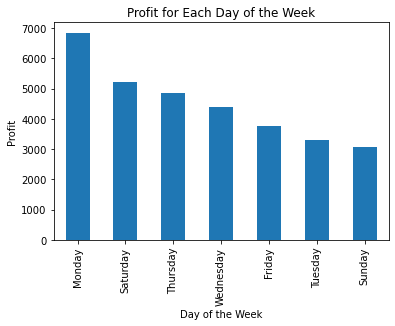

In [14]:
# Sort the days in descending order based on profit
day_profit = day_profit.sort_values(ascending=False)

# Create a bar graph to represent the profit for each day of the week
day_profit.plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Profit")
plt.title("Profit for Each Day of the Week")
plt.show()

In [27]:
# Load the sales data from sales_data_2.csv
sales_data_2 = pd.read_csv("sales_data_2.csv")

In [16]:
# Convert the 'Date' column to a datetime object
sales_data_2["Date"] = pd.to_datetime(sales_data_2["Date"])

In [36]:
sales_data_2.head(3)

,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,Gross Profit
Date,,,,,,,
2023-08-21,Vendor6,72.11,60,Customer7,91.58,44,856.68
2023-08-21,Vendor4,75.08,92,Customer7,83.71,17,146.71
2023-08-21,Vendor7,83.93,16,Customer2,103.76,15,297.45


In [29]:
sales_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              70 non-null     object 
 1   Firm bought from  70 non-null     object 
 2   Buying price      70 non-null     float64
 3   Quantity bought   70 non-null     int64  
 4   Customer          70 non-null     object 
 5   Selling price     70 non-null     float64
 6   Quantity sold     70 non-null     int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ KB


### 6.Can you calculate a 3-day average of the daily gross profit from the sales_data_2.csv?

In [33]:
# Calculate the gross profit for each row
sales_data_2["Gross Profit"] = (sales_data_2["Selling price"] - sales_data_2["Buying price"]) * sales_data_2["Quantity sold"]

In [30]:
# Set the 'Date' column as the index for time-based calculations
sales_data_2.set_index("Date", inplace=True)

In [37]:
# Group the data by day and calculate the daily gross profit sum
daily_gross_profit = sales_data_2.groupby("Date")["Gross Profit"].sum()

# Calculate the 3-day rolling average of daily gross profit
three_day_avg_profit = daily_gross_profit.rolling(window=3).mean()

In [39]:
# Print the results
print("3-day average of the daily gross profit")
print(three_day_avg_profit)

3-day average of the daily gross profit
Date
2023-08-21            NaN
2023-08-22            NaN
2023-08-23    4848.386667
2023-08-24    4187.950000
2023-08-25    4340.146667
2023-08-26    4617.043333
2023-08-27    4023.853333
Name: Gross Profit, dtype: float64


#### Inference:
     1.The 3-day average of the daily gross profit are in the margin of 4000 to 5000

     2.There's a peak in profit around August 26, followed by a dip.
     
     3.The gross profit has been increasing steadily from August 23 to August 26.


### 7. Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset.

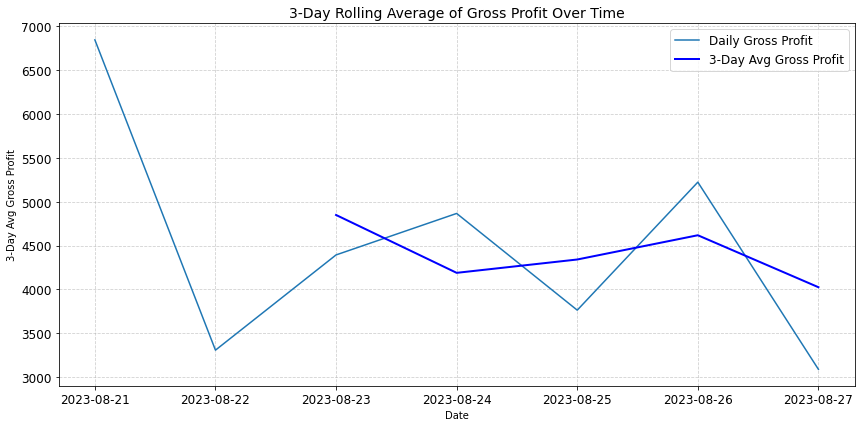

In [46]:
# Create a more visually appealing plot with custom styling
plt.figure(figsize=(12, 6))
plt.plot(daily_gross_profit.index, daily_gross_profit.values, label="Daily Gross Profit")
plt.plot(three_day_avg_profit.index, three_day_avg_profit.values, label="3-Day Avg Gross Profit", color='b', linewidth=2)
plt.xlabel("Date")
plt.ylabel("3-Day Avg Gross Profit")
plt.title("3-Day Rolling Average of Gross Profit Over Time", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()


### 8. Can you optimize the sales process to ensure gross margin is maximized?
#### a. Would you fire any vendor?
#### b. Would you let go of any customer?

In [89]:
vendor_summary = sales_data_2.groupby("Firm bought from").agg(
    Quantity_Sold=("Quantity sold", "sum"),
    Profit=("Gross Profit", "sum"),
)

# Calculate profit margin as (Profit / Total Revenue) * 100
vendor_summary["Profit Margin %"] = (vendor_summary["Profit"] / (sales_data_2.groupby("Firm bought from")["Selling price"].sum())) 

# Reset the index for a cleaner presentation
vendor_summary.reset_index(inplace=True)
vendor_summary

,Firm bought from,Quantity_Sold,Profit,Profit Margin %
0,Vendor1,162,1555.59,6.232831
1,Vendor10,189,3040.62,9.208698
2,Vendor2,207,1296.98,1.852564
3,Vendor3,229,6370.67,10.331766
4,Vendor4,272,6903.31,9.312689
5,Vendor5,96,1616.14,3.062843
6,Vendor6,79,1217.95,8.019160
7,Vendor7,270,4961.05,4.706253
8,Vendor8,23,253.74,1.257384
9,Vendor9,170,4266.70,7.102998


#### Inference:

1. Would you fire any vendor?
    - From the data it is clear that **Vendor 3 and Vendor 4** have the highest total profits, which might make them particularly valuable to the business.
    - By calculating the Profit Margin, **Vendor2 and Vendor8** have relatively low profit margins (around 1.85% and 1.26%, respectively). In comparison, Vendor 8 has the lowest profit margin and the sum of quantity sold is also very less(23 products).
    - It is also essential  to review their pricing or cost structures to improve profitability or consider if there are other strategic reasons to continue working with them else  it may be a reasonable decision to terminate the relationship with **Vendor 8.**
    
    
2. Would you let go of any customer?
    - A customer's value extends beyond a single transaction. Over time, a loyal customer can contribute significantly to your business's revenue and profitability through repeat purchases and increased spending.
    - In addition to this, cutting off customer relationships may result in the loss of valuable insights.
    - Provided we have information on the customers payment details, then we can eliminate those customers who consistently fail to pay on time or have a history of non-payment may strain the company's cash flow.
    - So, it is important to understand that letting go of a customer is an important decision to make that could impact the business in the long run
    - Thus, we can **continue forward without any termination of customers.**

### 9. To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market. Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices?

In [90]:
# Calculate the 25th, 50th (median), and 75th percentiles for buying prices
percentiles_buying = sales_data_2["Buying price"].quantile([0.25, 0.5, 0.75])

# Calculate the 25th, 50th (median), and 75th percentiles for selling prices
percentiles_selling = sales_data_2["Selling price"].quantile([0.25, 0.5, 0.75])


In [55]:
# Print the results
print("Percentiles for Buying Prices:")
print("25th Percentile (Q1):", percentiles_buying[0.25])
print("Median (Q2):", percentiles_buying[0.5])
print(f"75th Percentile (Q3):{percentiles_buying[0.75]:2f}")
print("\nPercentiles for Selling Prices:")
print("25th Percentile (Q1):", percentiles_selling[0.25])
print(f"Median (Q2):{percentiles_selling[0.5]:2f}")
print(f"75th Percentile (Q3):{percentiles_selling[0.75]:2f}")

Percentiles for Buying Prices:
25th Percentile (Q1): 29.9
Median (Q2): 60.76
75th Percentile (Q3):78.320000

Percentiles for Selling Prices:
25th Percentile (Q1): 38.975
Median (Q2):78.990000
75th Percentile (Q3):103.397500


#### Ram's benchmark

1. Buying Prices:
    - 25% of the market's buying prices are below 29.9 suggesting that other businesses in the same industry have lower buying prices. So Ram can negotiate lower prices with its suppliers.
    - Half of the businesses in the market are paying more than 60.76 for the same product or service
    - 75% of the market's buying prices are below 78.32


2. Selling prices:
    - 25% of the market's selling prices are below 38.975
    - 78.99, represents the middle point in the distribution of selling prices
    - 75% of the market's selling prices are below 103.3975 suggesting that other businesses in the same industry have lower selling prices. Thus, business can raise its prices without losing sales.

### 10. Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.


In [65]:
# Filter Sapota's data based on buying and selling prices
sapota_buying_below_Q1 = sales_data_2[sales_data_2["Buying price"] <= percentiles_buying[0.25]]
sapota_buying_above_Q3 = sales_data_2[sales_data_2["Buying price"] >= percentiles_buying[0.75]]
sapota_selling_below_Q1 = sales_data_2[sales_data_2["Selling price"] <= percentiles_selling[0.25]]
sapota_selling_above_Q3 = sales_data_2[sales_data_2["Selling price"] >= percentiles_selling[0.75]]

# Calculate the frequency of falling below Q1 and above Q3 for buying and selling prices
frequency_buying_below_Q1 = len(sapota_buying_below_Q1)
frequency_buying_above_Q3 = len(sapota_buying_above_Q3)
frequency_selling_below_Q1 = len(sapota_selling_below_Q1)
frequency_selling_above_Q3 = len(sapota_selling_above_Q3)

# Print the results
print("Sapota's Buying Price Analysis:")
print(f"Frequency of Buying Price Below Q1: {frequency_buying_below_Q1} times")
print(f"Frequency of Buying Price Above Q3: {frequency_buying_above_Q3} times")
print()
print("Sapota's Selling Price Analysis:")
print(f"Frequency of Selling Price Below Q1: {frequency_selling_below_Q1} times")
print(f"Frequency of Selling Price Above Q3: {frequency_selling_above_Q3} times")

Sapota's Buying Price Analysis:
Frequency of Buying Price Below Q1: 18 times
Frequency of Buying Price Above Q3: 18 times

Sapota's Selling Price Analysis:
Frequency of Selling Price Below Q1: 18 times
Frequency of Selling Price Above Q3: 18 times


### 11.Bharath says that Vendor 4 has to be honored. What impact does it have on your optimal gross margin?

In [85]:
vendor_summary = sales_data_2.groupby("Firm bought from").agg(
    Quantity_Sold=("Quantity sold", "sum"),
    Profit=("Gross Profit", "sum"),
)

# Calculate profit margin as (Profit / Total Revenue) * 100
vendor_summary["Profit Margin %"] = (vendor_summary["Profit"] / (sales_data_2.groupby("Firm bought from")["Selling price"].sum())) 

# Calculate each vendor's contribution in quantity sold as a percentage of the total quantity sold
total_quantity_sold = sales_data_2["Quantity sold"].sum()
vendor_summary["Contribution in Quantity Sold (%)"] = (vendor_summary["Quantity_Sold"] / total_quantity_sold) * 100

# Calculate each vendor's contribution in profit as a percentage of the total profit
total_profit = vendor_summary["Profit"].sum()
vendor_summary["Contribution in Profit (%)"] = (vendor_summary["Profit"] / total_profit) * 100

# Reset the index for a cleaner presentation
vendor_summary.reset_index(inplace=True)

In [86]:
vendor_summary

,Firm bought from,Quantity_Sold,Profit,Profit Margin %,Contribution in Quantity Sold (%),Contribution in Profit (%)
0,Vendor1,162,1555.59,6.232831,9.546258,4.941087
1,Vendor10,189,3040.62,9.208698,11.137301,9.658051
2,Vendor2,207,1296.98,1.852564,12.197996,4.119653
3,Vendor3,229,6370.67,10.331766,13.494402,20.235431
4,Vendor4,272,6903.31,9.312689,16.028285,21.927278
5,Vendor5,96,1616.14,3.062843,5.657042,5.133414
6,Vendor6,79,1217.95,8.019160,4.655274,3.868626
7,Vendor7,270,4961.05,4.706253,15.910430,15.757994
8,Vendor8,23,253.74,1.257384,1.355333,0.805965
9,Vendor9,170,4266.70,7.102998,10.017678,13.552501


#### Reasons to honour Vendor 4:

1. Vendor 4 has the maximum number of customers i.e. **8 customers**

2. Maxiumum quantity sold is around **16%**

3. Maximum profit margin is **22%**

### 12. Which vendor should we have a strategic tie up so that we source only from them (the goal here is to have the highest gross margin)? What’s the theoretical max margin the firm could have from that branch?


From the above Vendor summary table,
   - Vendor that should have a strategic tie up : **Vendor 3**

   - Profit Margin: **10.33%**

   - Total Profit: **Rs.6,370.67**

#### Inference:

High profit margin and a substantial total profit, indicating a strong contribution to gross margin. By considering a strategic tie-up with Vendor 3, you may be able to **secure favorable terms and exclusive deals** that maximize your gross margin.


### 13. Given this is the ground truth, what is the price elasticity of Sapota for that branch? (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down)


In [ ]:
vendor_summary = sales_data_2.groupby("Firm bought from").agg(
    Quantity_Sold=("Quantity sold", "sum"),
    Profit=("Gross Profit", "sum"),
)

# Calculate profit margin as (Profit / Total Revenue) * 100
vendor_summary["Profit Margin %"] = (vendor_summary["Profit"] / (sales_data_2.groupby("Firm bought from")["Selling price"].sum())) 

# Reset the index for a cleaner presentation
vendor_summary.reset_index(inplace=True)
vendor_summary